# Predicting the prices of S&P500 using LSTM models

## Importing dependencies for reading data and dataframe manipulation

In [50]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reading stock(S&P500) data

In [51]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period = 'max')
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [52]:
# removing dividends and stock splits as we won't be using them
sp500 = sp500.drop(columns = ['Dividends', 'Stock Splits'])

In [53]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2023-08-11 00:00:00-04:00,4450.689941,4476.229980,4443.979980,4464.049805,3753290000
2023-08-14 00:00:00-04:00,4458.129883,4490.330078,4453.439941,4489.720215,3896410000
2023-08-15 00:00:00-04:00,4478.870117,4478.870117,4432.189941,4437.859863,3832250000


<Axes: xlabel='Date'>

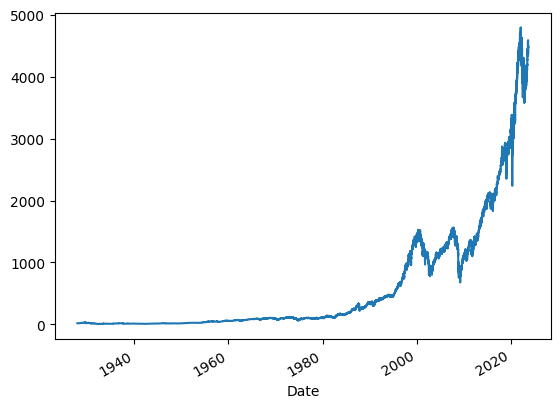

In [54]:
sp500['Close'].plot(kind = 'line')

In [55]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2023-08-11 00:00:00-04:00,4450.689941,4476.229980,4443.979980,4464.049805,3753290000
2023-08-14 00:00:00-04:00,4458.129883,4490.330078,4453.439941,4489.720215,3896410000
2023-08-15 00:00:00-04:00,4478.870117,4478.870117,4432.189941,4437.859863,3832250000


In [56]:
sp500['Close-1'] = sp500['Close'].shift(1)
sp500['Close-2'] = sp500['Close'].shift(2)
sp500['Close-3'] = sp500['Close'].shift(3)
sp500.head()

,Open,High,Low,Close,Volume,Close-1,Close-2,Close-3
Date,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,NaN,NaN,NaN
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.660000,NaN,NaN
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.760000,17.660000,NaN
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.719999,17.760000,17.66
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.549999,17.719999,17.76


In [57]:
sp500 = sp500.dropna()

In [58]:
def df_to_X_y(df, predictors, target):

    M = df[predictors].to_numpy()
    dates = df.index.to_numpy()
    X = M.reshape((len(dates), M.shape[1], 1))
    y = df[target].to_numpy()

    return dates, X.astype(np.float32), y.astype(np.float32)



predictors = [f'Close-{x}' for x in [1, 2, 3]]

target = 'Close'

dates, X, y = df_to_X_y(sp500, predictors, target)

dates.shape, X.shape, y.shape

((24019,), (24019, 3, 1), (24019,))

In [59]:
# Splitting up the dates into 80% of the history and 90% of the history
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

# first 80% of the dates
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

# the next 10% after
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

# the final 10%
dates_test, X_test, y_test= dates[q_90:], X[q_90:], y[q_90:]

dates_train.shape, X_train.shape, y_train.shape

((19215,), (19215, 3, 1), (19215,))

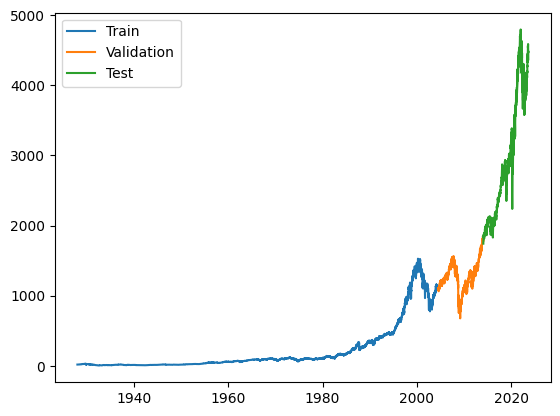

In [60]:
# colouring the time period where trainings, validations, tests are conducted

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.legend(['Train', 'Validation', 'Test'])


In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [62]:
# layers input shape is (3,1) because we have 3 predictors and 1 target (i.e a univariate forecasting)

model = Sequential([layers.Input((3,1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(1)])

model.compile(loss = 'mse', optimizer = Adam(learning_rate = 0.001), metrics = ['mean_absolute_error'])

model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 100) # 100 runs through the dataset

Epoch 1/100
601/601 [==============================] - 7s 6ms/step - loss: 42507.1797 - mean_absolute_error: 62.7846 - val_loss: 31851.5703 - val_mean_absolute_error: 131.3188
Epoch 2/100
601/601 [==============================] - 3s 5ms/step - loss: 441.4840 - mean_absolute_error: 6.7103 - val_loss: 12741.1836 - val_mean_absolute_error: 79.5348
Epoch 3/100
601/601 [==============================] - 4s 6ms/step - loss: 703.4386 - mean_absolute_error: 8.9309 - val_loss: 18872.5020 - val_mean_absolute_error: 96.3496
Epoch 4/100
601/601 [==============================] - 3s 5ms/step - loss: 413.5417 - mean_absolute_error: 8.0269 - val_loss: 25197.3457 - val_mean_absolute_error: 120.5023
Epoch 5/100
601/601 [==============================] - 3s 5ms/step - loss: 375.2509 - mean_absolute_error: 8.4503 - val_loss: 13934.6650 - val_mean_absolute_error: 99.5613
Epoch 6/100
601/601 [==============================] - 3s 5ms/step - loss: 276.0867 - mean_absolute_error: 7.2861 - val_loss: 10350.619

76/76 [==============================] - 0s 3ms/step


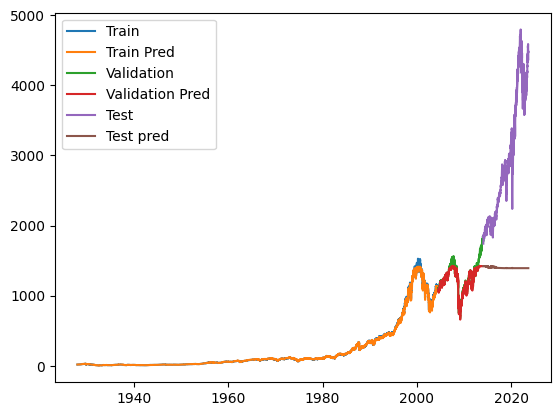

In [63]:
# plotting the graphs of train data with predicted train data, validation data with predicted validation data, test data with predicted test data

y_train_pred = model.predict(X_train).flatten()
y_val_pred = model.predict(X_val).flatten()
y_test_pred = model.predict(X_test).flatten()

# %matplotlib notebook to zoom in
plt.plot(dates_train, y_train)
plt.plot(dates_train, y_train_pred)
plt.plot(dates_val, y_val)
plt.plot(dates_val, y_val_pred)
plt.plot(dates_test, y_test)
plt.plot(dates_test, y_test_pred)
plt.legend(['Train', 'Train Pred', 'Validation', 'Validation Pred', 'Test', 'Test pred'])

# Suspicion
In training data, it is expected that the `y_train_pred` (orange) closely follows the data `y_train`. For validation data, when we zoomed into the graph using `%matplotlib notebook`, we can see that the deviation begins to be more significant near the end. Lastly, in the prediction data we have that the predicted data, `y_test_pred` (brown) is far from true data, `y_test` (purple). I suspect that this is because of the rapid spike (seemingly unbounded compared to train data)

# Correction Attempt
To avoid the above stated problem, I will use only the stock close data from last years (252 days). This will significantly decrease the data availale for training, but the predictions should be more sensitive to pick up spikes and follow them closely.

In [64]:
sp500new = sp500[-252:]
sp500new.head()

,Open,High,Low,Close,Volume,Close-1,Close-2,Close-3
Date,,,,,,,,
2022-08-17 00:00:00-04:00,4280.399902,4302.180176,4253.080078,4274.040039,3885030000,4305.200195,4297.140137,4280.149902
2022-08-18 00:00:00-04:00,4273.129883,4292.529785,4261.979980,4283.740234,3340330000,4274.040039,4305.200195,4297.140137
2022-08-19 00:00:00-04:00,4266.310059,4266.310059,4218.700195,4228.479980,3761340000,4283.740234,4274.040039,4305.200195
2022-08-22 00:00:00-04:00,4195.080078,4195.080078,4129.859863,4137.990234,3907430000,4228.479980,4283.740234,4274.040039
2022-08-23 00:00:00-04:00,4133.089844,4159.770020,4124.029785,4128.729980,3823520000,4137.990234,4228.479980,4283.740234


In [65]:
std_dev = sp500new.std(ddof=1)
mu = sp500new.mean()
sp500new_std = (sp500new - mu) / std_dev
sp500new_std.head()


,Open,High,Low,Close,Volume,Close-1,Close-2,Close-3
Date,,,,,,,,
2022-08-17 00:00:00-04:00,0.875084,0.878077,0.848118,0.843337,-0.392586,0.975517,0.945612,0.879946
2022-08-18 00:00:00-04:00,0.844676,0.836633,0.884299,0.883784,-1.074773,0.845431,0.979331,0.951250
2022-08-19 00:00:00-04:00,0.816151,0.724031,0.708355,0.653365,-0.547497,0.885927,0.848975,0.985076
2022-08-22 00:00:00-04:00,0.518220,0.418129,0.347194,0.276049,-0.364532,0.655230,0.889555,0.854305
2022-08-23 00:00:00-04:00,0.258936,0.266488,0.323493,0.237436,-0.469622,0.277460,0.658377,0.895014


In [66]:
dates, X, y = df_to_X_y(sp500new_std, predictors, target)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

In [67]:
# Splitting up the dates into 80% of the history and 90% of the history
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

# first 80% of the dates
dates_train, X_train_std, y_train_std = dates[:q_80], X[:q_80], y[:q_80]

# the next 10% after
dates_val, X_val_std, y_val_std = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

# the final 10%
dates_test, X_test_std, y_test_std= dates[q_90:], X[q_90:], y[q_90:]

dates_train.shape, X_train_std.shape, y_train_std.shape

((201,), (201, 3, 1), (201,))

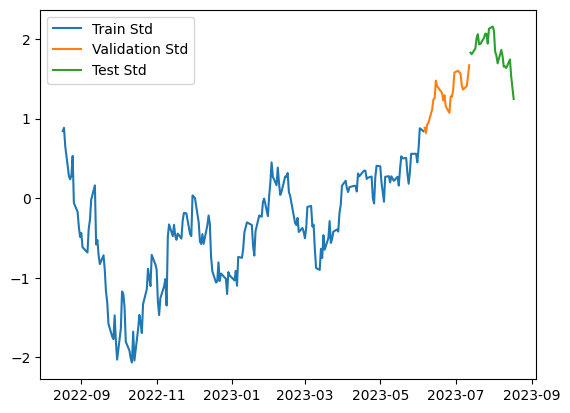

In [68]:
plt.plot(dates_train, y_train_std)
plt.plot(dates_val, y_val_std)
plt.plot(dates_test, y_test_std)
plt.legend(['Train Std', 'Validation Std', 'Test Std'])

In [69]:
model = Sequential([layers.Input((3,1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(1)])

model.compile(loss = 'mse', optimizer = Adam(learning_rate = 0.001), metrics = ['mean_absolute_error'])

model.fit(X_train_std, y_train_std, validation_data = (X_val_std, y_val_std), epochs = 100) # 100 runs through the dataset

Epoch 1/100
7/7 [==============================] - 3s 127ms/step - loss: 0.5864 - mean_absolute_error: 0.5871 - val_loss: 1.4421 - val_mean_absolute_error: 1.1822
Epoch 2/100
7/7 [==============================] - 0s 20ms/step - loss: 0.4132 - mean_absolute_error: 0.4920 - val_loss: 1.2718 - val_mean_absolute_error: 1.1097
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 0.2584 - mean_absolute_error: 0.3915 - val_loss: 1.1124 - val_mean_absolute_error: 1.0371
Epoch 4/100
7/7 [==============================] - 0s 17ms/step - loss: 0.1419 - mean_absolute_error: 0.2916 - val_loss: 0.9087 - val_mean_absolute_error: 0.9357
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0877 - mean_absolute_error: 0.2429 - val_loss: 0.6592 - val_mean_absolute_error: 0.7936
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0844 - mean_absolute_error: 0.2399 - val_loss: 0.4400 - val_mean_absolute_error: 0.6430
Epoch 7/100
7/7 [==========

1/1 [==============================] - 0s 22ms/step


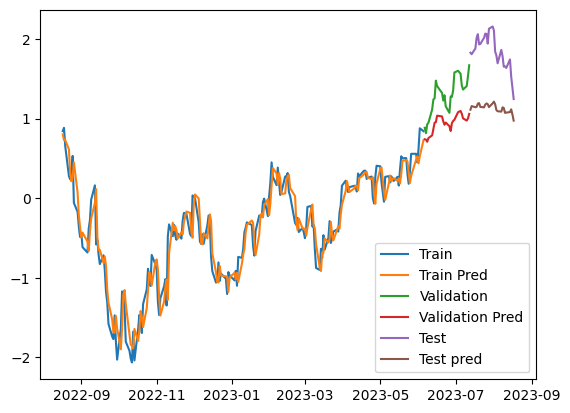

In [70]:
# plotting the graphs of train data with predicted train data, validation data with predicted validation data, test data with predicted test data

y_train_pred_std = model.predict(X_train_std).flatten()
y_val_pred_std = model.predict(X_val_std).flatten()
y_test_pred_std = model.predict(X_test_std).flatten()

# %matplotlib notebook to zoom in
plt.plot(dates_train, y_train_std)
plt.plot(dates_train, y_train_pred_std)
plt.plot(dates_val, y_val_std)
plt.plot(dates_val, y_val_pred_std)
plt.plot(dates_test, y_test_std)
plt.plot(dates_test, y_test_pred_std)
plt.legend(['Train', 'Train Pred', 'Validation', 'Validation Pred', 'Test', 'Test pred'])

## Scaling the results back to normal

In [71]:
y_train_pred_std.shape

(201,)

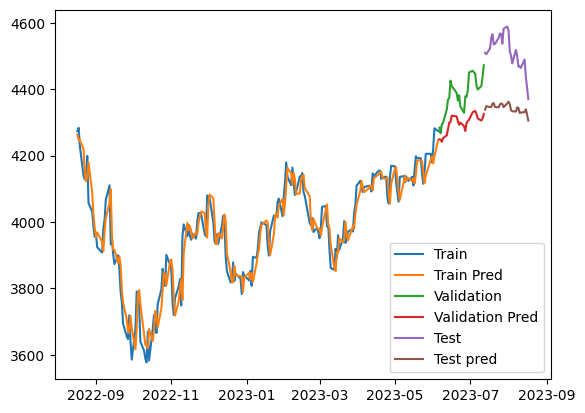

In [72]:
y_train_pred = y_train_pred_std * std_dev['Close'] + mu['Close']
y_val_pred = y_val_pred_std *std_dev['Close'] + mu['Close']
y_test_pred = y_test_pred_std * std_dev['Close'] + mu['Close']
y_train = y_train_std * std_dev['Close'] + mu['Close']
y_val = y_val_std* std_dev['Close'] + mu['Close']
y_test = y_test_std * std_dev['Close'] + mu['Close']

plt.plot(dates_train, y_train)
plt.plot(dates_train, y_train_pred)
plt.plot(dates_val, y_val)
plt.plot(dates_val, y_val_pred)
plt.plot(dates_test, y_test)
plt.plot(dates_test, y_test_pred)
plt.legend(['Train', 'Train Pred', 'Validation', 'Validation Pred', 'Test', 'Test pred'])

## Adding new predictors to see if there's any improvements

So far we have only use the stock prices from the previous 3 days to predict future/current price. I noticed that there is no value that could indicate if there is an increase or decrease from yesterday. Hence here I will add 2 new predictors where they contains the price difference from yesterday and the before that.

In [73]:
sp500.head()

,Open,High,Low,Close,Volume,Close-1,Close-2,Close-3
Date,,,,,,,,
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.719999,17.760000,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.549999,17.719999,17.760000
1928-01-09 00:00:00-05:00,17.500000,17.500000,17.500000,17.500000,0,17.660000,17.549999,17.719999
1928-01-10 00:00:00-05:00,17.370001,17.370001,17.370001,17.370001,0,17.500000,17.660000,17.549999
1928-01-11 00:00:00-05:00,17.350000,17.350000,17.350000,17.350000,0,17.370001,17.500000,17.660000


In [74]:
# let's just remove unwanted columns
sp500 = sp500.drop(columns = ['Open', 'High', 'Low', 'Volume'])
sp500.head()

,Close,Close-1,Close-2,Close-3
Date,,,,
1928-01-05 00:00:00-05:00,17.549999,17.719999,17.760000,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.549999,17.719999,17.760000
1928-01-09 00:00:00-05:00,17.500000,17.660000,17.549999,17.719999
1928-01-10 00:00:00-05:00,17.370001,17.500000,17.660000,17.549999
1928-01-11 00:00:00-05:00,17.350000,17.370001,17.500000,17.660000


In [75]:
# introducing the 2 new predictors

sp500['Diff-1'] = sp500['Close'] - sp500['Close-1']
sp500['Diff-2'] = sp500['Close'] - sp500['Close-2']
sp500.head()

,Close,Close-1,Close-2,Close-3,Diff-1,Diff-2
Date,,,,,,
1928-01-05 00:00:00-05:00,17.549999,17.719999,17.760000,17.660000,-0.170000,-0.210001
1928-01-06 00:00:00-05:00,17.660000,17.549999,17.719999,17.760000,0.110001,-0.059999
1928-01-09 00:00:00-05:00,17.500000,17.660000,17.549999,17.719999,-0.160000,-0.049999
1928-01-10 00:00:00-05:00,17.370001,17.500000,17.660000,17.549999,-0.129999,-0.289999
1928-01-11 00:00:00-05:00,17.350000,17.370001,17.500000,17.660000,-0.020000,-0.150000


In [76]:
# again we are just gonna use the last year's data
sp500new = sp500[-252:]
sp500new.head()

,Close,Close-1,Close-2,Close-3,Diff-1,Diff-2
Date,,,,,,
2022-08-17 00:00:00-04:00,4274.040039,4305.200195,4297.140137,4280.149902,-31.160156,-23.100098
2022-08-18 00:00:00-04:00,4283.740234,4274.040039,4305.200195,4297.140137,9.700195,-21.459961
2022-08-19 00:00:00-04:00,4228.479980,4283.740234,4274.040039,4305.200195,-55.260254,-45.560059
2022-08-22 00:00:00-04:00,4137.990234,4228.479980,4283.740234,4274.040039,-90.489746,-145.750000
2022-08-23 00:00:00-04:00,4128.729980,4137.990234,4228.479980,4283.740234,-9.260254,-99.750000


In [77]:
# scaling using normalisation
std_dev = sp500new.std(ddof=1)
mu = sp500new.mean()
sp500new_std = (sp500new - mu) / std_dev
sp500new_std.head()


,Close,Close-1,Close-2,Close-3,Diff-1,Diff-2
Date,,,,,,
2022-08-17 00:00:00-04:00,0.843337,0.975517,0.945612,0.879946,-0.681091,-0.363962
2022-08-18 00:00:00-04:00,0.883784,0.845431,0.979331,0.951250,0.204674,-0.338863
2022-08-19 00:00:00-04:00,0.653365,0.885927,0.848975,0.985076,-1.203530,-0.707662
2022-08-22 00:00:00-04:00,0.276049,0.655230,0.889555,0.854305,-1.967231,-2.240849
2022-08-23 00:00:00-04:00,0.237436,0.277460,0.658377,0.895014,-0.206348,-1.536920


In [78]:
# we add the two new columns into our predictors
predictors += ['Diff-1', 'Diff-2']
predictors

['Close-1', 'Close-2', 'Close-3', 'Diff-1', 'Diff-2']

In [79]:
# setting dates, X, and y
dates, X, y = df_to_X_y(sp500new_std, predictors, target)

dates.shape, X.shape, y.shape

((252,), (252, 5, 1), (252,))

In [80]:
# the same code as before
# Splitting up the dates into 80% of the history and 90% of the history
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

# first 80% of the dates
dates_train, X_train_std, y_train_std = dates[:q_80], X[:q_80], y[:q_80]

# the next 10% after
dates_val, X_val_std, y_val_std = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

# the final 10%
dates_test, X_test_std, y_test_std= dates[q_90:], X[q_90:], y[q_90:]

dates_train.shape, X_train_std.shape, y_train_std.shape

((201,), (201, 5, 1), (201,))

In [81]:
# defining our LSTM models
model = Sequential([layers.Input((5,1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(1)])

model.compile(loss = 'mse', optimizer = Adam(learning_rate = 0.001), metrics = ['mean_absolute_error'])

model.fit(X_train_std, y_train_std, validation_data = (X_val_std, y_val_std), epochs = 100) # 100 runs through the dataset

Epoch 1/100
7/7 [==============================] - 4s 160ms/step - loss: 0.5340 - mean_absolute_error: 0.5648 - val_loss: 1.4453 - val_mean_absolute_error: 1.1849
Epoch 2/100
7/7 [==============================] - 0s 22ms/step - loss: 0.4090 - mean_absolute_error: 0.4999 - val_loss: 1.3385 - val_mean_absolute_error: 1.1405
Epoch 3/100
7/7 [==============================] - 0s 20ms/step - loss: 0.2530 - mean_absolute_error: 0.3929 - val_loss: 1.1322 - val_mean_absolute_error: 1.0485
Epoch 4/100
7/7 [==============================] - 0s 17ms/step - loss: 0.1065 - mean_absolute_error: 0.2623 - val_loss: 0.8285 - val_mean_absolute_error: 0.8948
Epoch 5/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0763 - mean_absolute_error: 0.2359 - val_loss: 0.5183 - val_mean_absolute_error: 0.7030
Epoch 6/100
7/7 [==============================] - 0s 21ms/step - loss: 0.0359 - mean_absolute_error: 0.1486 - val_loss: 0.2848 - val_mean_absolute_error: 0.5133
Epoch 7/100
7/7 [==========

1/1 [==============================] - 0s 23ms/step


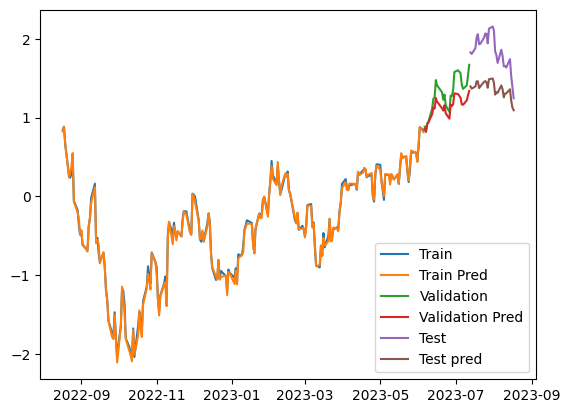

In [82]:
# plottig our predictions with the actual stock price for comparison
y_train_pred_std = model.predict(X_train_std).flatten()
y_val_pred_std = model.predict(X_val_std).flatten()
y_test_pred_std = model.predict(X_test_std).flatten()

# %matplotlib notebook to zoom in
plt.plot(dates_train, y_train_std)
plt.plot(dates_train, y_train_pred_std)
plt.plot(dates_val, y_val_std)
plt.plot(dates_val, y_val_pred_std)
plt.plot(dates_test, y_test_std)
plt.plot(dates_test, y_test_pred_std)
plt.legend(['Train', 'Train Pred', 'Validation', 'Validation Pred', 'Test', 'Test pred'])

## Scaling the values back to normal.

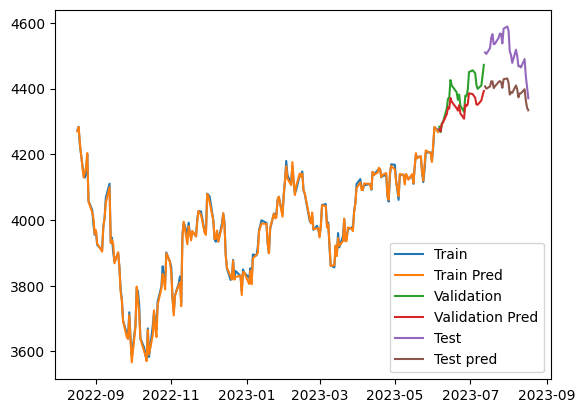

In [83]:
y_train_pred = y_train_pred_std * std_dev['Close'] + mu['Close']
y_val_pred = y_val_pred_std *std_dev['Close'] + mu['Close']
y_test_pred = y_test_pred_std * std_dev['Close'] + mu['Close']
y_train = y_train_std * std_dev['Close'] + mu['Close']
y_val = y_val_std* std_dev['Close'] + mu['Close']
y_test = y_test_std * std_dev['Close'] + mu['Close']

plt.plot(dates_train, y_train)
plt.plot(dates_train, y_train_pred)
plt.plot(dates_val, y_val)
plt.plot(dates_val, y_val_pred)
plt.plot(dates_test, y_test)
plt.plot(dates_test, y_test_pred)
plt.legend(['Train', 'Train Pred', 'Validation', 'Validation Pred', 'Test', 'Test pred'])

## Conclusions: By introducing the difference in stock prices as predictors, we get an almost 50% in absolute error reductions.

# Recreational testing:
In the above model, we have used standardised scaling, but just for fun I'm gonna try using max-min scaling. This is not advisable for predicting stock prices as there is no theoretical maximum for stock's price, but I'm gonna do it anyway :D

In [84]:
# Scaling the data using max-min
rg = sp500new.max() - sp500new.min()
m = sp500new.min()

sp500new_std = (sp500new - m) / rg
sp500new_std.tail()


,Close,Close-1,Close-2,Close-3,Diff-1,Diff-2
Date,,,,,,
2023-08-11 00:00:00-04:00,0.876562,0.881286,0.880179,0.911476,0.448588,0.399278
2023-08-14 00:00:00-04:00,0.901930,0.876562,0.881286,0.880179,0.527574,0.458741
2023-08-15 00:00:00-04:00,0.850681,0.901930,0.876562,0.881286,0.326468,0.344709
2023-08-16 00:00:00-04:00,0.817547,0.850681,0.901930,0.876562,0.374015,0.201322
2023-08-17 00:00:00-04:00,0.783977,0.817547,0.850681,0.901930,0.372873,0.244653


In [85]:
dates, X, y = df_to_X_y(sp500new_std, predictors, target)

dates.shape, X.shape, y.shape

((252,), (252, 5, 1), (252,))

In [86]:
# the same code as before
# Splitting up the dates into 80% of the history and 90% of the history
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

# first 80% of the dates
dates_train, X_train_std, y_train_std = dates[:q_80], X[:q_80], y[:q_80]

# the next 10% after
dates_val, X_val_std, y_val_std = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

# the final 10%
dates_test, X_test_std, y_test_std= dates[q_90:], X[q_90:], y[q_90:]

dates_train.shape, X_train_std.shape, y_train_std.shape

((201,), (201, 5, 1), (201,))

In [87]:
# defining our LSTM models
model = Sequential([layers.Input((5,1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(1)])

model.compile(loss = 'mse', optimizer = Adam(learning_rate = 0.001), metrics = ['mean_absolute_error'])

model.fit(X_train_std, y_train_std, validation_data = (X_val_std, y_val_std), epochs = 100) # 100 runs through the dataset

Epoch 1/100
7/7 [==============================] - 5s 147ms/step - loss: 0.1300 - mean_absolute_error: 0.3267 - val_loss: 0.3114 - val_mean_absolute_error: 0.5562
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0349 - mean_absolute_error: 0.1576 - val_loss: 0.0640 - val_mean_absolute_error: 0.2505
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0182 - mean_absolute_error: 0.1066 - val_loss: 0.0165 - val_mean_absolute_error: 0.1247
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0156 - mean_absolute_error: 0.0975 - val_loss: 0.0717 - val_mean_absolute_error: 0.2655
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0119 - mean_absolute_error: 0.0895 - val_loss: 0.0883 - val_mean_absolute_error: 0.2950
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0112 - mean_absolute_error: 0.0848 - val_loss: 0.0536 - val_mean_absolute_error: 0.2293
Epoch 7/100
7/7 [==========

1/1 [==============================] - 0s 30ms/step


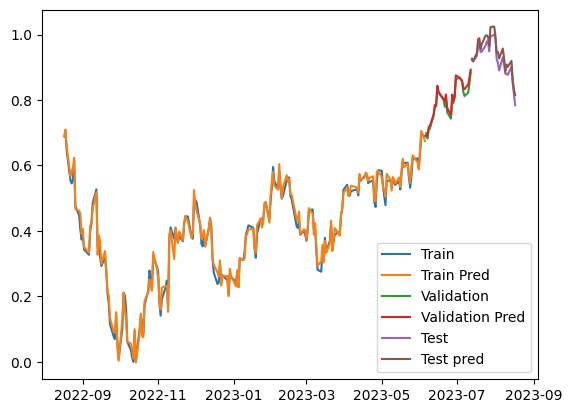

In [88]:
# plottig our predictions with the actual stock price for comparison
y_train_pred_std = model.predict(X_train_std).flatten()
y_val_pred_std = model.predict(X_val_std).flatten()
y_test_pred_std = model.predict(X_test_std).flatten()

# %matplotlib notebook to zoom in
plt.plot(dates_train, y_train_std)
plt.plot(dates_train, y_train_pred_std)
plt.plot(dates_val, y_val_std)
plt.plot(dates_val, y_val_pred_std)
plt.plot(dates_test, y_test_std)
plt.plot(dates_test, y_test_pred_std)
plt.legend(['Train', 'Train Pred', 'Validation', 'Validation Pred', 'Test', 'Test pred'])

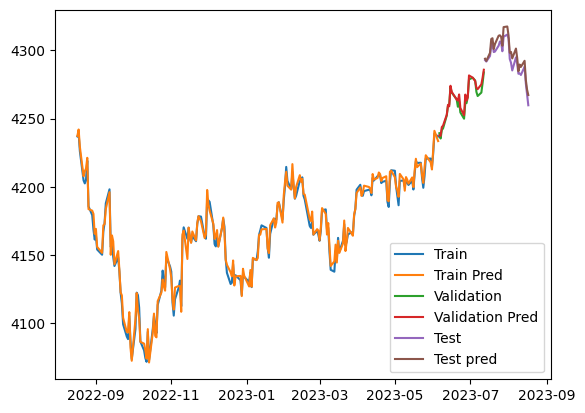

In [89]:

y_train_pred = y_train_pred_std * std_dev['Close'] + mu['Close']
y_val_pred = y_val_pred_std *std_dev['Close'] + mu['Close']
y_test_pred = y_test_pred_std * std_dev['Close'] + mu['Close']
y_train = y_train_std * std_dev['Close'] + mu['Close']
y_val = y_val_std* std_dev['Close'] + mu['Close']
y_test = y_test_std * std_dev['Close'] + mu['Close']

plt.plot(dates_train, y_train)
plt.plot(dates_train, y_train_pred)
plt.plot(dates_val, y_val)
plt.plot(dates_val, y_val_pred)
plt.plot(dates_test, y_test)
plt.plot(dates_test, y_test_pred)
plt.legend(['Train', 'Train Pred', 'Validation', 'Validation Pred', 'Test', 'Test pred'])

Suprisingly this works way too good.